<a href="https://colab.research.google.com/github/TulioIsaak/AI-studies/blob/main/Perceptron_03_RNA_UFPEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Passos para criar um perceptron usando TensorFlow:**
*   Importar as bibliotecas necessárias
*   Carregar e preparar o dataset
*   Definir e compilar o modelo do perceptron
*   Treinar o modelo
*   Avaliar o modelo

Importando as bibliotecas e carregando o dataset: Importamos o TensorFlow para criar o modelo e funções do scikit-learn para manipular o dataset e realizar a padronização.

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


Carregar e preparar o dataset.

Carregamos o dataset Iris e modificamos o problema para ser uma classificação binária. Dividimos o dataset em conjuntos de treinamento e teste e padronizamos os dados.

In [ ]:
# Carregar e preparar o dataset
iris = load_iris()
X = iris.data
y = iris.target

# Vamos converter o problema em uma classificação binária (separar classe 0 de 1 e 2)
y = (y != 0).astype(int)

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Definir e compilar o modelo do perceptron: criamos um modelo sequencial com uma única camada densa com ativação sigmoid, que é adequada para classificação binária.:

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


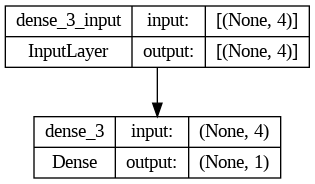

In [ ]:
# Definir o modelo do perceptron
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

# Ver a topologia do modelo criado
model.summary()

# Ver a topologia do modelo criado usando o plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Treinar o modelo: Treinamos o modelo por 100 épocas com um tamanho de lote de 10.

In [ ]:
# Treinar o modelo
history=model.fit(X_train, y_train, epochs=100, batch_size=10,  validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
12/12 [==============================] - 2s 104ms/step - loss: 0.9144 - accuracy: 0.2417 - val_loss: 0.9084 - val_accuracy: 0.2667
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 0.8927 - accuracy: 0.2417 - val_loss: 0.8859 - val_accuracy: 0.2667
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8717 - accuracy: 0.2500 - val_loss: 0.8640 - val_accuracy: 0.2667
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8517 - accuracy: 0.2833 - val_loss: 0.8423 - val_accuracy: 0.2667
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 0.8313 - accuracy: 0.3250 - val_loss: 0.8219 - val_accuracy: 0.2667
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.8123 - accuracy: 0.3333 - val_loss: 0.8015 - val_accuracy: 0.2667
Epoch 7/100
12/12 [==============================] - 0s 18ms/step - loss: 0.7933 - accuracy: 0.3417 - val_loss: 0.7819 - val_accuracy: 0.2667
Epoch 8/

Avaliação do Modelo: Avaliamos o modelo no conjunto de teste e calculamos a acurácia das previsões.

In [ ]:
# Avaliar o modelo
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

1/1 [==============================] - 0s 77ms/step
Accuracy: 100.00%


Usamos o histórico do treinamento (history) para acessar loss, val_loss, accuracy, e val_accuracy.

Isso apresenta gráficos que mostram como a função de perda e a acurácia mudam ao longo das épocas tanto para os conjuntos de treinamento quanto para os de validação.

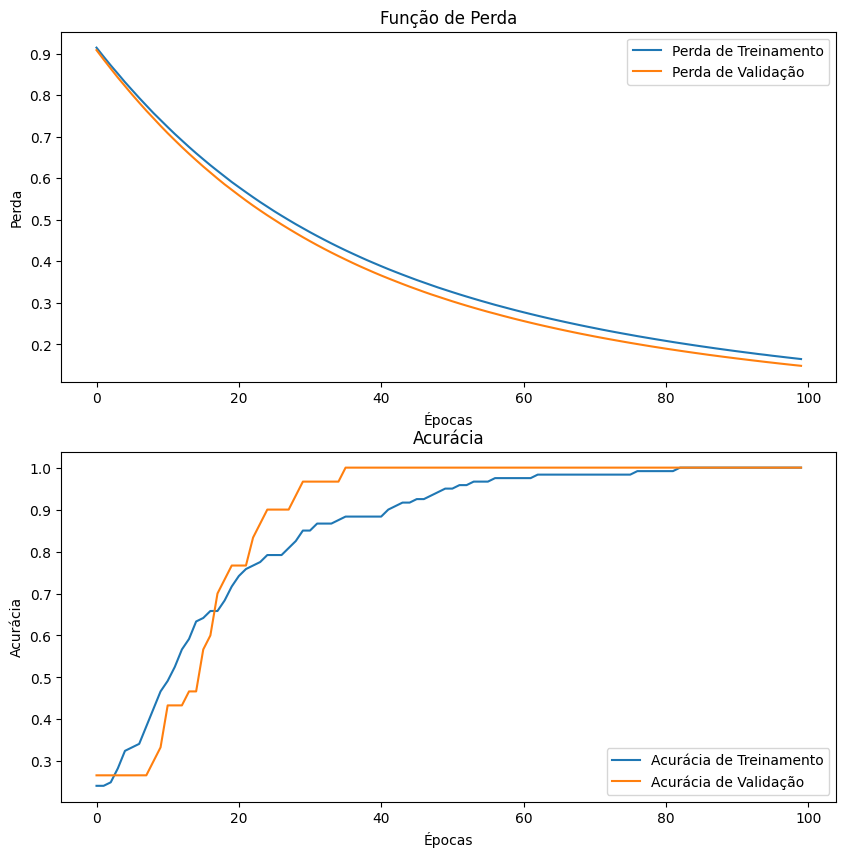

In [ ]:
# Plotar a função de perda e a acurácia
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Perda
axs[0].plot(history.history['loss'], label='Perda de Treinamento')
axs[0].plot(history.history['val_loss'], label='Perda de Validação')
axs[0].set_title('Função de Perda')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Perda')
axs[0].legend()

# Acurácia
axs[1].plot(history.history['accuracy'], label='Acurácia de Treinamento')
axs[1].plot(history.history['val_accuracy'], label='Acurácia de Validação')
axs[1].set_title('Acurácia')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Acurácia')
axs[1].legend()

plt.show()


Salvando a rede.
Esta linha salva o modelo treinado em um arquivo chamado perceptron_model.h5.


In [ ]:
model.save('perceptron_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Esta linha carrega o modelo salvo a partir do arquivo perceptron_model.h5.


In [ ]:
loaded_model = tf.keras.models.load_model('perceptron_model.h5')

Avaliar o modelo carregado para garantir que ele funcione corretamente após ser salvo e recarregado.

In [ ]:
loaded_y_pred = (loaded_model.predict(X_test) > 0.5).astype(int)
loaded_accuracy = accuracy_score(y_test, loaded_y_pred)
print(f"Loaded model accuracy: {loaded_accuracy * 100:.2f}%")

1/1 [==============================] - 0s 50ms/step
Loaded model accuracy: 100.00%
